# Michiels Neural Networks Notebook


## My first neural network simply using numpy
source: https://www.youtube.com/watch?v=kft1AJ9WVDk

In [12]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

training_inputs = np.array([[0,0,1],
                           [1,1,1],
                           [1,0,1],
                           [0,1,1]])

training_outputs = np.array([[0,1,1,0]]).T

np.random.seed(1)

synaptic_weights = 2 + np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

for iteration in range (1000):
    input_layer = training_inputs
    
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    
print('outputs')
print(outputs)

Random starting synaptic weights: 
[[1.417022  ]
 [1.72032449]
 [1.00011437]]
outputs
[[0.73108107]
 [0.98428749]
 [0.91812474]
 [0.93822198]]


## As above but improved
With sigmoid_derivative 

In [13]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return  x * (1-x)

training_inputs = np.array([[0,0,1],
                           [1,1,1],
                           [1,0,1],
                           [0,1,1]])

training_outputs = np.array([[0,1,1,0]]).T

np.random.seed(1)

synaptic_weights = 2 + np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

for iteration in range (50000):
    input_layer = training_inputs
    
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    
    error = training_outputs - outputs
    
    adjustments = error * sigmoid_derivative(outputs)
    
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training')
print(synaptic_weights)
    
print('Outputs after trainig')
print(outputs)

Random starting synaptic weights: 
[[1.417022  ]
 [1.72032449]
 [1.00011437]]
Synaptic weights after training
[[11.30928823]
 [-0.2049903 ]
 [-5.45009058]]
Outputs after trainig
[[0.00427758]
 [0.99650944]
 [0.99715456]
 [0.00348752]]


## As above but with using class

https://www.youtube.com/watch?v=Py4xvZx-A1E

In [14]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        np.random.seed(1)
        
        self.synaptic_weights = 2 * np.random.random((3,1))-1
    
    def sigmoid(self, x):
        return 1 /(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1-x)
    
    def train(self, training_inputs, training_outputs, training_iterations):
       
        for iteration in range(training_iterations):
        
            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
    
    def think(self, inputs):
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        
        return output

if __name__ == "__main__":
    
    neural_network = NeuralNetwork()
 
    print(neural_network.synaptic_weights)
    
    training_inputs = np.array([[0,0,1],
                           [1,1,1],
                           [1,0,1],
                           [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T
    
    neural_network.train(training_inputs, training_outputs, 10000)
    
    print('synaptic weights after training')
    print(neural_network.synaptic_weights)
    
    A = str(input("Input 1: "))
    B = str(input("Input 2: "))
    C = str(input("Input 3: "))
    
    print('new situation: input data = ', A,B,C)
    print ("output data: ")
    print(neural_network.think(np.array([A,B,C])))
    ## use A=1 B=0 and C=0 as inputs

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
synaptic weights after training
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Input 1: 1
Input 2: 0
Input 3: 0
new situation: input data =  1 0 0
output data: 
[0.99993704]


## Plotting the sigmoid function using math / numpy

Source: https://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using

In [15]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

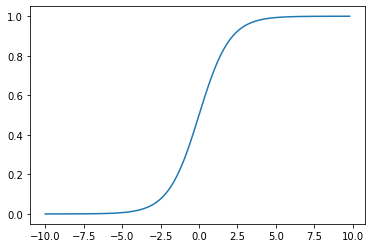

In [18]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()


## Intro to Machine Learning 
https://www.youtube.com/watch?v=KNAWp2S3w94&t=2s

In [6]:
#the simplest neural network y = 2x - 1
import keras
import numpy as np

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])]) #1 neuron, x-value is input for model
model.compile(optimizer='sgd', loss='mean_squared_error')

# geef x's and y's with y= 2x-1
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)
#predict the y-value for a given x
print(model.predict([10.0]))#normaal is het 19 maar bij machine learning wordt 

Epoch 1/500
6/6 [==============================] - 0s 40ms/step - loss: 0.7510
Epoch 2/500
6/6 [==============================] - 0s 502us/step - loss: 0.7110
Epoch 3/500
6/6 [==============================] - 0s 498us/step - loss: 0.6771
Epoch 4/500
6/6 [==============================] - 0s 332us/step - loss: 0.6480
Epoch 5/500
6/6 [==============================] - 0s 333us/step - loss: 0.6227
Epoch 6/500
6/6 [==============================] - 0s 499us/step - loss: 0.6005
Epoch 7/500
6/6 [==============================] - 0s 332us/step - loss: 0.5808
Epoch 8/500
6/6 [==============================] - 0s 332us/step - loss: 0.5630
Epoch 9/500
6/6 [==============================] - 0s 499us/step - loss: 0.5469
Epoch 10/500
6/6 [==============================] - 0s 998us/step - loss: 0.5321
Epoch 11/500
6/6 [==============================] - 0s 333us/step - loss: 0.5183
Epoch 12/500
6/6 [==============================] - 0s 498us/step - loss: 0.5054
Epoch 13/500
6/6 [====================

Epoch 103/500
6/6 [==============================] - 0s 332us/step - loss: 0.0751
Epoch 104/500
6/6 [==============================] - 0s 332us/step - loss: 0.0735
Epoch 105/500
6/6 [==============================] - 0s 664us/step - loss: 0.0720
Epoch 106/500
6/6 [==============================] - 0s 828us/step - loss: 0.0705
Epoch 107/500
6/6 [==============================] - 0s 498us/step - loss: 0.0691
Epoch 108/500
6/6 [==============================] - 0s 665us/step - loss: 0.0677
Epoch 109/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 110/500
6/6 [==============================] - 0s 333us/step - loss: 0.0649
Epoch 111/500
6/6 [==============================] - 0s 332us/step - loss: 0.0636
Epoch 112/500
6/6 [==============================] - 0s 332us/step - loss: 0.0623
Epoch 113/500
6/6 [==============================] - 0s 332us/step - loss: 0.0610
Epoch 114/500
6/6 [==============================] - 0s 331us/step - loss: 0.0598
Epoch 115/500
6/6 

Epoch 203/500
6/6 [==============================] - 0s 498us/step - loss: 0.0094
Epoch 204/500
6/6 [==============================] - 0s 332us/step - loss: 0.0092
Epoch 205/500
6/6 [==============================] - 0s 332us/step - loss: 0.0090
Epoch 206/500
6/6 [==============================] - 0s 499us/step - loss: 0.0089
Epoch 207/500
6/6 [==============================] - 0s 167us/step - loss: 0.0087
Epoch 208/500
6/6 [==============================] - 0s 166us/step - loss: 0.0085
Epoch 209/500
6/6 [==============================] - 0s 670us/step - loss: 0.0083
Epoch 210/500
6/6 [==============================] - 0s 166us/step - loss: 0.0081
Epoch 211/500
6/6 [==============================] - 0s 499us/step - loss: 0.0080
Epoch 212/500
6/6 [==============================] - 0s 333us/step - loss: 0.0078
Epoch 213/500
6/6 [==============================] - 0s 165us/step - loss: 0.0077
Epoch 214/500
6/6 [==============================] - 0s 333us/step - loss: 0.0075
Epoch 215/500
6/

Epoch 303/500
6/6 [==============================] - 0s 499us/step - loss: 0.0012
Epoch 304/500
6/6 [==============================] - 0s 499us/step - loss: 0.0012
Epoch 305/500
6/6 [==============================] - 0s 667us/step - loss: 0.0011
Epoch 306/500
6/6 [==============================] - 0s 333us/step - loss: 0.0011
Epoch 307/500
6/6 [==============================] - 0s 499us/step - loss: 0.0011
Epoch 308/500
6/6 [==============================] - 0s 333us/step - loss: 0.0011
Epoch 309/500
6/6 [==============================] - 0s 498us/step - loss: 0.0010
Epoch 310/500
6/6 [==============================] - 0s 497us/step - loss: 0.0010
Epoch 311/500
6/6 [==============================] - 0s 333us/step - loss: 0.0010
Epoch 312/500
6/6 [==============================] - 0s 332us/step - loss: 9.8108e-04
Epoch 313/500
6/6 [==============================] - 0s 499us/step - loss: 9.6092e-04
Epoch 314/500
6/6 [==============================] - 0s 502us/step - loss: 9.4119e-04
Epoc

Epoch 399/500
6/6 [==============================] - 0s 167us/step - loss: 1.6126e-04
Epoch 400/500
6/6 [==============================] - 0s 333us/step - loss: 1.5794e-04
Epoch 401/500
6/6 [==============================] - 0s 831us/step - loss: 1.5470e-04
Epoch 402/500
6/6 [==============================] - 0s 331us/step - loss: 1.5152e-04
Epoch 403/500
6/6 [==============================] - 0s 1ms/step - loss: 1.4841e-04
Epoch 404/500
6/6 [==============================] - 0s 333us/step - loss: 1.4536e-04
Epoch 405/500
6/6 [==============================] - 0s 333us/step - loss: 1.4238e-04
Epoch 406/500
6/6 [==============================] - 0s 332us/step - loss: 1.3945e-04
Epoch 407/500
6/6 [==============================] - 0s 499us/step - loss: 1.3659e-04
Epoch 408/500
6/6 [==============================] - 0s 332us/step - loss: 1.3378e-04
Epoch 409/500
6/6 [==============================] - 0s 499us/step - loss: 1.3103e-04
Epoch 410/500
6/6 [==============================] - 0s 

Epoch 495/500
6/6 [==============================] - 0s 332us/step - loss: 2.1990e-05
Epoch 496/500
6/6 [==============================] - 0s 500us/step - loss: 2.1538e-05
Epoch 497/500
6/6 [==============================] - 0s 333us/step - loss: 2.1096e-05
Epoch 498/500
6/6 [==============================] - 0s 331us/step - loss: 2.0661e-05
Epoch 499/500
6/6 [==============================] - 0s 499us/step - loss: 2.0237e-05
Epoch 500/500
6/6 [==============================] - 0s 665us/step - loss: 1.9822e-05
[[18.987011]]


## Natural language processing

https://www.youtube.com/watch?v=fNxaJsNG3-s

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words =100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


https://www.youtube.com/watch?v=r9QjkdSJZ2g

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words =100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post')
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [15]:
import json

with open ('Sarcasm_Headlines_Dataset.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['.is_sarcastic'])
    urls.append(item['article_link'])
    

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

JSONDecodeError: Extra data: line 2 column 1 (char 217)

## Neural Structured Learning
https://www.youtube.com/watch?v=N_IS3x5wFNI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=5


In [ ]:
import neural_structured_learning as nsl

